In [71]:
import pandas as pd
import numpy as np

In [62]:
s = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e'])
print(s)


a    1
b    3
c    5
d    7
e    9
dtype: int64


In [72]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
print(df)


   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


In [5]:
print(df['A'])  # Access column
print(df.loc[0])  # Access row by label
print(df.iloc[0])  # Access row by index


0    1
1    2
2    3
Name: A, dtype: int64
A    1
B    4
C    7
Name: 0, dtype: int64
A    1
B    4
C    7
Name: 0, dtype: int64


Exercises

1.	Create a Series with country names as indices and their capitals as values.
2.	Convert a NumPy array into a DataFrame.
3.	Retrieve a specific column from a DataFrame.
4.	Retrieve the first three rows of a DataFrame.
5.	Modify a specific row's values in a DataFrame.


Data Cleaning & Handling Missing Data

Detecting Missing Data

What is NaN?
NaN stands for "Not a Number".
It represents missing values in numerical and object (string) data types.

What is NaT?
NaT stands for "Not a Time".
It is used exclusively for missing datetime values in Pandas.
NaT is similar to NaN, but specifically for date and time data.

In [6]:
df.isnull()


,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False


It returns a DataFrame of the same shape as df, where:
True means the value is missing (NaN)
False means the value is not missing

In [7]:
df.isna()

,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False


df.isnull() and df.isna() are identical in Pandas.

df.isnull().sum()	Counts missing values per column

In [8]:
df.isna().sum()

A    0
B    0
C    0
dtype: int64

Handling Missing data

The df.fillna() function in Pandas is used to replace missing values (NaN or NaT) with a specified value.

Missing values (NaN or NaT) can cause issues in data analysis, machine learning, and visualization.
fillna() helps to replace these missing values with:
A specific value (e.g., 0, mean, median, etc.).
A forward or backward filled value (propagating existing values).
A computed value using a function.

In [9]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, np.nan, 30],  # Bob's Age is missing (NaN)
    'City': ['New York', np.nan, 'Chicago']  # Charlie's City is missing (NaN)
})
print(df,"\n")

# Filling NaN with a specific value
df_filled = df.fillna("Unknown")

print(df_filled)


      Name   Age      City
0    Alice  25.0  New York
1      Bob   NaN       NaN
2  Charlie  30.0   Chicago 

      Name      Age      City
0    Alice     25.0  New York
1      Bob  Unknown   Unknown
2  Charlie     30.0   Chicago


In [10]:
df_filled = df.fillna({'Age': 0, 'City': 'Unknown'})
print(df_filled)


      Name   Age      City
0    Alice  25.0  New York
1      Bob   0.0   Unknown
2  Charlie  30.0   Chicago


In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill NaN with mean of Age
print(df)


      Name   Age      City
0    Alice  25.0  New York
1      Bob  27.5       NaN
2  Charlie  30.0   Chicago


C:\Users\Zainab\AppData\Local\Temp\ipykernel_9896\2369752753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill NaN with mean of Age


In [12]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, np.nan, 30],  # Bob's Age is missing (NaN)
    'City': ['New York', np.nan, 'Chicago']  # Charlie's City is missing (NaN)
})

# Filling NaN with a specific value
df_filled = df.fillna("Unknown")

print(df_filled)


      Name      Age      City
0    Alice     25.0  New York
1      Bob  Unknown   Unknown
2  Charlie     30.0   Chicago


In [13]:
df_ffill = df.fillna(method='ffill') #ffill means forward fill
print(df_ffill)


      Name   Age      City
0    Alice  25.0  New York
1      Bob  25.0  New York
2  Charlie  30.0   Chicago


C:\Users\Zainab\AppData\Local\Temp\ipykernel_9896\1560776005.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill') #ffill means forward fill


In [14]:
df_bfill = df.fillna(method='bfill') #bfill means backward fill
print(df_bfill)


      Name   Age      City
0    Alice  25.0  New York
1      Bob  30.0   Chicago
2  Charlie  30.0   Chicago


C:\Users\Zainab\AppData\Local\Temp\ipykernel_9896\1700172544.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill') #bfill means backward fill


df.fillna() replaces missing (NaN) values.
You can fill missing values with:
A specific value (fillna(0), fillna("Unknown")).
A column's mean, median, or mode.
Forward (ffill) or backward (bfill) fill.
Helps in data cleaning and preprocessing.

In [15]:
df.fillna(value=0)

,Name,Age,City
0,Alice,25.0,New York
1,Bob,0.0,0
2,Charlie,30.0,Chicago


The df.dropna() function in Pandas is used to remove rows or columns that contain missing values (NaN or NaT).


Missing values (NaN or NaT) can cause errors in analysis, machine learning, and visualization.
dropna() removes incomplete data so that only valid entries remain.

In [16]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, np.nan, 30, 22],  # Bob's Age is missing (NaN)
    'City': ['New York', 'Los Angeles', np.nan, 'Chicago']  # Charlie's City is missing (NaN)
})

print("Original DataFrame:")
print(df)

# Drop rows with any NaN values
df_cleaned = df.dropna()

print("\nDataFrame after dropna():")
print(df_cleaned)


Original DataFrame:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0          NaN
3    David  22.0      Chicago

DataFrame after dropna():
    Name   Age      City
0  Alice  25.0  New York
3  David  22.0   Chicago


In [17]:
df_no_columns = df.dropna(axis=1)  # Removes columns with any NaN
print(df_no_columns)


      Name
0    Alice
1      Bob
2  Charlie
3    David


In [18]:
df_thresh = df.dropna(thresh=2)  # Keep rows with at least 2 non-NaN values
print(df_thresh)


      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0          NaN
3    David  22.0      Chicago


In [19]:
df_all_nan = pd.DataFrame({
    'A': [np.nan, 2, np.nan],
    'B': [np.nan, np.nan, 3],
    'C': [np.nan, np.nan, np.nan]
})

print(df_all_nan,"\n\n")

df_dropped_all = df_all_nan.dropna(how='all')
print(df_dropped_all)


     A    B   C
0  NaN  NaN NaN
1  2.0  NaN NaN
2  NaN  3.0 NaN 


     A    B   C
1  2.0  NaN NaN
2  NaN  3.0 NaN


In [20]:
df_filtered = df.dropna(subset=['Age'])  # Remove rows where 'Age' is NaN
print(df_filtered)


      Name   Age      City
0    Alice  25.0  New York
2  Charlie  30.0       NaN
3    David  22.0   Chicago


In [21]:
df.dropna()

,Name,Age,City
0,Alice,25.0,New York
3,David,22.0,Chicago


Exercises
1.	Detect missing values in a dataset.
2.	Replace missing values with the column mean.
3.	Drop all rows with missing values.
4.	Fill missing values with a fixed value.
5.	Interpolate missing values in time series data.


In [22]:
# Creating a DataFrame from a dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'San Francisco', 'Los Angeles']
}
df = pd.DataFrame(data)

print("Pandas DataFrame:")
df


Pandas DataFrame:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,35,Los Angeles


In [23]:
# Adding a new column
df['Salary'] = [50000, 60000, 70000]
print("DataFrame with Salary column added:")
print(df)


DataFrame with Salary column added:
      Name  Age           City  Salary
0    Alice   25       New York   50000
1      Bob   30  San Francisco   60000
2  Charlie   35    Los Angeles   70000


In [24]:
df[['Name', 'City']]



,Name,City
0,Alice,New York
1,Bob,San Francisco
2,Charlie,Los Angeles


In [25]:
df.loc[df['Age'] > 25]

,Name,Age,City,Salary
1,Bob,30,San Francisco,60000
2,Charlie,35,Los Angeles,70000


In [26]:
df[df['Salary'] > 50000]

,Name,Age,City,Salary
1,Bob,30,San Francisco,60000
2,Charlie,35,Los Angeles,70000


Exercises
1.	Select a subset of columns from a DataFrame.
2.	Filter rows based on a condition.
3.	Filter rows based on multiple conditions.
4.	Select specific rows using .loc[] and .iloc[].
5.	Retrieve only even-indexed rows from a DataFrame.


Sorting Data

In [27]:
df.sort_values(by='Age', ascending=False)

,Name,Age,City,Salary
2,Charlie,35,Los Angeles,70000
1,Bob,30,San Francisco,60000
0,Alice,25,New York,50000


In [28]:
df.rename(columns={'Age': 'Years'}, inplace=True)

In [29]:
df

,Name,Years,City,Salary
0,Alice,25,New York,50000
1,Bob,30,San Francisco,60000
2,Charlie,35,Los Angeles,70000


Exercises
1.	Sort a DataFrame by a numerical column.
2.	Rename a column.
3.	Add a new column.
4.	Remove a column.
5.	Sort by multiple columns.


Use GroupBy

In [80]:
import pandas as pd

# Creating a sample DataFrame
data = {
    'Category': ['Electronics', 'Furniture', 'Electronics', 'Clothing', 'Furniture', 'Clothing'],
    'Sales': [1000, 500, 700, 300, 800, 400]
}

df = pd.DataFrame(data)
print(df)


      Category  Sales
0  Electronics   1000
1    Furniture    500
2  Electronics    700
3     Clothing    300
4    Furniture    800
5     Clothing    400


In [86]:
sales_by_category = df.groupby('Category')['Sales'].sum()
print(sales_by_category)

Category
Clothing        700
Electronics    1700
Furniture      1300
Name: Sales, dtype: int64


1. Groups the rows by Category (Electronics, Furniture, Clothing).
2. Sums the Sales values for each group.
3. Returns a Pandas Series where the index is Category and the values are the sum of Sales.

Here, Category is now the index instead of a column.
This result is a Pandas Series, not a DataFrame.

In [32]:
sales_by_category_df = df.groupby('Category', as_index=False)['Sales'].sum()
print(sales_by_category_df)

      Category  Sales
0     Clothing    700
1  Electronics   1700
2    Furniture   1300


Now, Category remains a column, not an index.
The result is a DataFrame, making it easier for further processing, merging, or exporting.

In [92]:
import pandas as pd

# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C', 'B'],
    'Value': [10, 20, 15, 25, 30, 35, 40, 50]
}

df = pd.DataFrame(data)

print(df,)

  Category  Value
0        A     10
1        B     20
2        A     15
3        B     25
4        A     30
5        C     35
6        C     40
7        B     50


In [95]:
# Group the data by 'Category'
grouped_data = df.groupby('Category')


In [98]:
# Print the groups
for name, group in grouped_data:
    print(f"Category: {name}")
    print(group, "\n")

Category: A
  Category  Value
0        A     10
2        A     15
4        A     30 

Category: B
  Category  Value
1        B     20
3        B     25
7        B     50 

Category: C
  Category  Value
5        C     35
6        C     40 



Explanation

1. The .groupby('Category') function groups the DataFrame by the Category column.
2. We can iterate over the grouped object to see the individual groups.
3. This is useful when analyzing how data is distributed across different categories.

In [36]:
# Find the average (mean) Value for each Category
average_per_group = df.groupby('Category')['Value'].mean()
print(average_per_group)


Category
A    18.333333
B    31.666667
C    37.500000
Name: Value, dtype: float64


The .groupby('Category')['Value'].mean() calculates the average value for each category.
It returns a Pandas Series where the index is Category, and values are the mean of Value.
This is useful when analyzing the average sales, performance, or trends per category.

In [37]:
# Count the number of rows per category
count_per_group = df.groupby('Category')['Value'].count()
print(count_per_group)


Category
A    3
B    3
C    2
Name: Value, dtype: int64


.count() counts the number of rows per category.
Useful for checking how frequently each category appears.
Common in sales data (e.g., how many orders per product type).

In [38]:
# Find the maximum value for each category
max_per_group = df.groupby('Category')['Value'].max()
print(max_per_group)


Category
A    30
B    50
C    40
Name: Value, dtype: int64


In [39]:
# Apply multiple functions: mean, max, and count
aggregated_data = df.groupby('Category')['Value'].agg(['mean', 'max', 'count'])
print(aggregated_data)


               mean  max  count
Category                       
A         18.333333   30      3
B         31.666667   50      3
C         37.500000   40      2


.agg(['mean', 'max', 'count']) applies multiple functions at once.
Instead of running mean(), max(), and count() separately, we do it in a single step.
This is useful for comprehensive reports showing multiple insights at once.

Function	           Purpose
.groupby()	           Groups data by a categorical column
.mean()	               Finds the average value per group
.count()	           Counts the number of items per group
.max()	               Finds the highest value per group
.agg([functions])	   Applies multiple aggregation functions


Exercise 1: Group Data by a Categorical Column

Create a DataFrame sales_data with columns:

Product: Name of the product (e.g., "Laptop", "Phone").
Category: Type of product (e.g., "Electronics", "Accessories").
Revenue: Sales revenue for each product.
Then, group the data by Category.

Exercise 2: Find the Average Value Per Group

Use the sales_data DataFrame.
Find the average revenue per product category.

Exercise 3: Count the Number of Items Per Group

Use the sales_data DataFrame.
Count how many products are in each category.

Exercise 4: Find the Max Value in Each Group

Use the sales_data DataFrame.
Find the highest revenue product in each category.

Exercise 5: Apply Multiple Aggregation Functions

Use the sales_data DataFrame.
Find the average, maximum, and count of revenue for each category using multiple aggregation functions.

In [40]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [1, 2, 3], 'Salary': [50000, 60000, 70000]})

# Merge the two DataFrames on 'ID'
merged_df = pd.merge(df1, df2, on='ID')

print(merged_df)


   ID     Name  Salary
0   1    Alice   50000
1   2      Bob   60000
2   3  Charlie   70000


In [41]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Salary': [60000, 70000, 80000]})

print(df1,"\n")
print(df2,"\n")

   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie 

   ID  Salary
0   2   60000
1   3   70000
2   4   80000 



In [42]:
# Perform an inner join
inner_join_df = pd.merge(df1, df2, on='ID', how='inner')

print(inner_join_df)

   ID     Name  Salary
0   2      Bob   60000
1   3  Charlie   70000


how='inner' ensures that only matching records (IDs 2 and 3) are included.
ID 4 from df2 and ID 1 from df1 are dropped because they have no match.
This is useful when combining data that must have a direct relationship (e.g., customers with purchases).

In [43]:
# Perform a left join
left_join_df = pd.merge(df1, df2, on='ID', how='left')

print(left_join_df)


   ID     Name   Salary
0   1    Alice      NaN
1   2      Bob  60000.0
2   3  Charlie  70000.0


how='left' keeps all rows from the left DataFrame (df1) and adds matching data from df2.
If no match is found, the missing values appear as NaN.
ID 1 remains in the output with a NaN Salary because it does not exist in df2.
This is useful for keeping all primary records (e.g., all employees even if they don’t have salary data yet).

In [44]:
df3 = pd.DataFrame({'ID': [4, 5], 'Name': ['David', 'Emma']})

# Concatenate df1 and df3
concat_df = pd.concat([df1, df3], ignore_index=True)

print(concat_df)


   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David
4   5     Emma


pd.concat([df1, df3], ignore_index=True) stacks the rows from df3 below df1.
Useful for appending data (e.g., adding new employees to an existing list).
ignore_index=True resets the index to maintain order.

In [45]:
df4 = pd.DataFrame({'ID': [1, 2, 3, 4], 'Department': ['HR', 'IT', 'Finance', 'Marketing']})

print(df1,"\n\n")

print(df2,"\n\n")

# Merge three DataFrames
final_df = df1.merge(df2, on='ID', how='left').merge(df4, on='ID', how='left')

print(final_df)


   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie 


   ID  Salary
0   2   60000
1   3   70000
2   4   80000 


   ID     Name   Salary Department
0   1    Alice      NaN         HR
1   2      Bob  60000.0         IT
2   3  Charlie  70000.0    Finance


We merge multiple DataFrames step by step.
First, merge df1 with df2 (left join), then merge the result with df4.
This is useful for combining data from multiple sources (e.g., employee names, salaries, and departments).

Operation	             Purpose
merge()	                 Combines DataFrames based on a common column
how='inner'	             Keeps only matching records from both DataFrames
how='left'	             Keeps all records from the left DataFrame, filling missing values with NaN
concat()	             Stacks DataFrames vertically or horizontally
Multiple merge()	     Combines multiple related datasets

Exercise 1: Merge Two DataFrames

Create two DataFrames:

students: Contains ID and Name.
marks: Contains ID and Math_Score.
Then, merge them based on ID.

Exercise 2: Perform an Inner Join

Create two DataFrames:

employees: Contains Employee_ID and Employee_Name.
salaries: Contains Employee_ID and Salary but includes some missing IDs.
Perform an inner join on Employee_ID.

Exercise 3: Perform a Left Join

Use the employees and salaries DataFrames from Exercise 2.
Perform a left join, keeping all employees even if they don’t have salary data.

Exercise 4: Concatenate Two DataFrames

Create two DataFrames:

batch_1: Contains students ID and Name.
batch_2: Contains more students with the same columns.
Concatenate them into a single DataFrame.

Exercise 5: Join Multiple DataFrames

Create three DataFrames:

students: Contains ID and Name.
marks: Contains ID and Math_Score.
departments: Contains ID and Department.
Merge them into a final DataFrame.

Convert a Date Column to Datetime Format

Create a DataFrame sales with columns:

Order_ID: Order number.
Order_Date: Date as a string (e.g., "2024-02-10").
Convert Order_Date into datetime format.

In [46]:
import pandas as pd

# Create DataFrame
sales = pd.DataFrame({
    'Order_ID': [101, 102, 103, 104],
    'Order_Date': ['2024-02-10', '2024-03-15', '2024-04-20', '2024-05-25']
})
print(sales.dtypes,"\n\n",sales,"\n\n")
# Convert 'Order_Date' to datetime format
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'])

print(sales.dtypes)
print("\n\n",sales,"\n")

Order_ID       int64
Order_Date    object
dtype: object 

    Order_ID  Order_Date
0       101  2024-02-10
1       102  2024-03-15
2       103  2024-04-20
3       104  2024-05-25 


Order_ID               int64
Order_Date    datetime64[ns]
dtype: object


    Order_ID Order_Date
0       101 2024-02-10
1       102 2024-03-15
2       103 2024-04-20
3       104 2024-05-25 



Use the sales DataFrame.
Extract the year and month from Order_Date and store them in new columns.

In [47]:
# Extract year and month
sales['Year'] = sales['Order_Date'].dt.year
sales['Month'] = sales['Order_Date'].dt.month

print(sales)


   Order_ID Order_Date  Year  Month
0       101 2024-02-10  2024      2
1       102 2024-03-15  2024      3
2       103 2024-04-20  2024      4
3       104 2024-05-25  2024      5


Create a time series DataFrame stock_prices with columns:

Date: A range of dates from "2024-01-01" to "2024-01-10".
Stock_Price: Random values representing stock prices.

In [48]:
import numpy as np

# Create Date Range
date_range = pd.date_range(start="2024-01-01", end="2024-01-05")

# Create DataFrame
stock_prices = pd.DataFrame({
    'Date': date_range,
    'Stock_Price': np.random.randint(100, 200, size=len(date_range))
})

print(stock_prices)


        Date  Stock_Price
0 2024-01-01          112
1 2024-01-02          142
2 2024-01-03          113
3 2024-01-04          104
4 2024-01-05          123


Use the stock_prices DataFrame.
Resample the stock prices by month and find the average price per month.

In [49]:
# Ensure 'Date' is the index
stock_prices.set_index('Date', inplace=True)

# Resample by month and calculate average
monthly_avg = stock_prices.resample('M').mean()

print(monthly_avg)


            Stock_Price
Date                   
2024-01-31        118.8


C:\Users\Zainab\AppData\Local\Temp\ipykernel_9896\3223535369.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = stock_prices.resample('M').mean()


The Date column is set as the index of the stock_prices DataFrame.
This is necessary because resampling requires a datetime index to aggregate data correctly.

Before Setting Index:
         Date       Stock_Price
0 2024-01-01      160
1 2024-01-02      152
2 2024-01-03      143
3 2024-01-04      183
4 2024-01-05      160


After Setting Index
            Stock_Price
Date                    
0 2024-01-01      160
1 2024-01-02      152
2 2024-01-03      143
3 2024-01-04      183
4 2024-01-05      160

Now, Date is no longer a column but an index.

resample('M') groups the data by month.
.mean() computes the average stock price for each month.

In [50]:
# Compute rolling average over a 3-day window
stock_prices['Rolling_Avg'] = stock_prices['Stock_Price'].rolling(window=3).mean()

print(stock_prices)


            Stock_Price  Rolling_Avg
Date                                
2024-01-01          112          NaN
2024-01-02          142          NaN
2024-01-03          113   122.333333
2024-01-04          104   119.666667
2024-01-05          123   113.333333


Computes a rolling average of Stock_Price over a 3-day window.

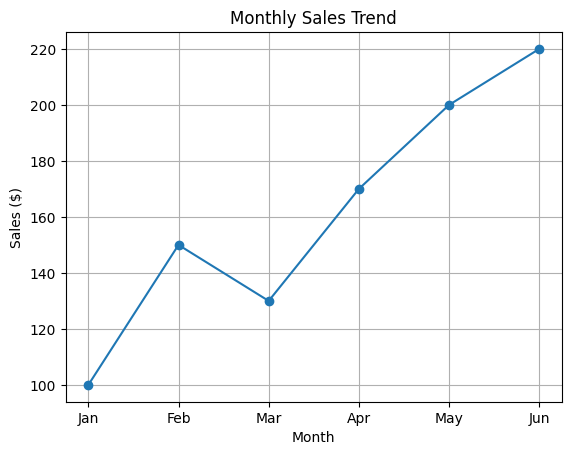

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
sales_data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Sales': [100, 150, 130, 170, 200, 220]
})

# Plot line graph
plt.plot(sales_data['Month'], sales_data['Sales'], marker='o', linestyle='-')

# Labels & Title
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Monthly Sales Trend")
plt.grid(True)

plt.show()


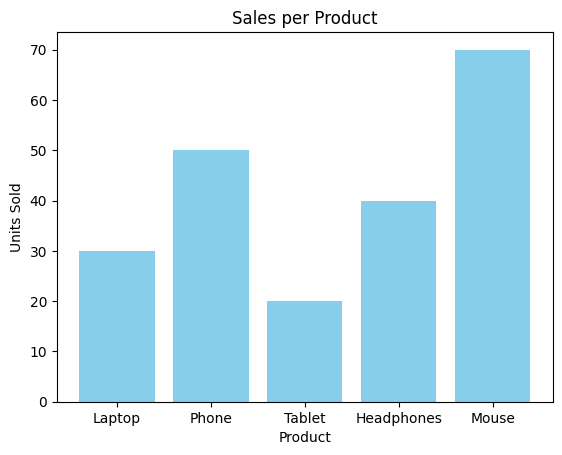

In [52]:
# Create DataFrame
product_sales = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Headphones', 'Mouse'],
    'Units Sold': [30, 50, 20, 40, 70]
})

# Plot bar graph
plt.bar(product_sales['Product'], product_sales['Units Sold'], color='skyblue')

# Labels & Title
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.title("Sales per Product")

plt.show()


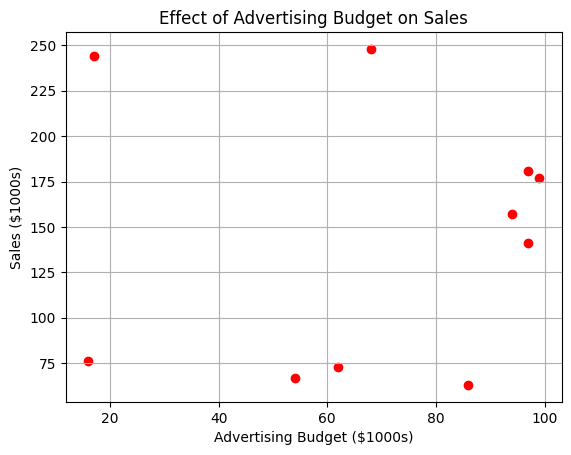

In [53]:
import numpy as np

# Create DataFrame
ad_data = pd.DataFrame({
    'Advertising Budget ($1000s)': np.random.randint(10, 100, 10),
    'Sales ($1000s)': np.random.randint(50, 300, 10)
})

# Plot scatter plot
plt.scatter(ad_data['Advertising Budget ($1000s)'], ad_data['Sales ($1000s)'], color='red')

# Labels & Title
plt.xlabel("Advertising Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Effect of Advertising Budget on Sales")
plt.grid(True)
plt.show()


    Scores
0       50
1       71
2       89
3       88
4       94
..     ...
95      80
96      69
97      88
98      59
99      89

[100 rows x 1 columns] 




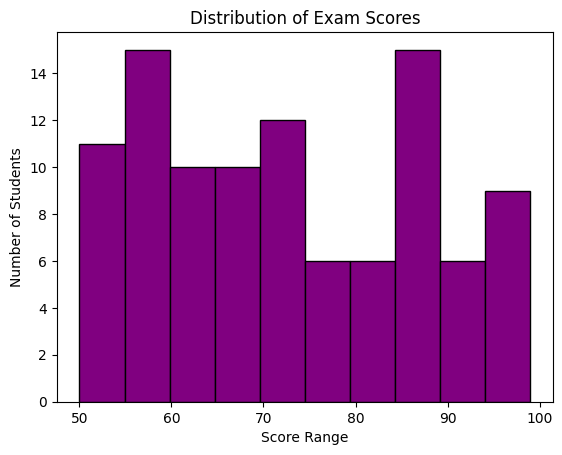

In [54]:
# Create DataFrame
exam_scores = pd.DataFrame({
    'Scores': np.random.randint(50, 100, 100)  # 100 students' scores
})
print(exam_scores,"\n\n")
# Plot histogram
plt.hist(exam_scores['Scores'], bins=10, color='purple', edgecolor='black')

# Labels & Title
plt.xlabel("Score Range")
plt.ylabel("Number of Students")
plt.title("Distribution of Exam Scores")

plt.show()


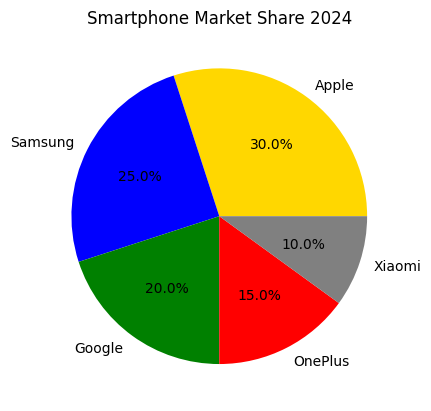

In [55]:
# Create DataFrame
market_share = pd.DataFrame({
    'Company': ['Apple', 'Samsung', 'Google', 'OnePlus', 'Xiaomi'],
    'Market Share (%)': [30, 25, 20, 15, 10]
})

# Plot pie chart
plt.pie(market_share['Market Share (%)'], labels=market_share['Company'], autopct='%1.1f%%', colors=['gold', 'blue', 'green', 'red', 'gray'])

# Title
plt.title("Smartphone Market Share 2024")

plt.show()


The autopct='%1.1f%%' parameter is used in Matplotlib's pie chart to display percentage values on the chart.

'%1.1f%%' means:

Show one decimal place in the percentage.
Append % to the value.
Example: 30.2%, 25.0%, 15.8%.